# Homework 02

## Exersice 12

### Solution:

Data given by question:

$X_d$ =  Last price after d days

N = Number of times the price of the stock has increased

$$
    \Pr[N=n] = \binom{d}{n} (p)^{n} (1-p)^{d-n}
$$

If the stock price increases n days, it decreases d-n days. 
The final price should be: $r^{n} \frac{1}{r^{d-n}} = r^{2n-d} $

$$
    \Pr[X=r^{2n-d}] = \Pr[X=r^{2n-d} \mid N=n]  \Pr[N=n]
                    = 1 \binom{d}{n} (p)^{n} (1-p)^{d-n}
$$

$$
\text{E}[X] = \sum_{n=0}^{d} X\Pr[X=r^{2n-d}] = \sum_{n=0}^{d} r^{2n-d}  \Pr[X=r^{2n-d}]
$$

$$
\text{E}[X] = \sum_{n=0}^{d} r^{2n-d} \binom{d}{n} p^{n} (1-p)^{d-n}
            = \sum_{n=0}^{d} \binom{d}{n} (\frac{1-p}{r})^{d-n} (rp)^{n}
$$

Using the Binomial theorem:
$$
(x+y)^n = \sum_{k=0}^{n} \binom{n}{k} {x}^{n-k} {y}^{k}
$$

$$
\text{E}[X] = (\frac{1-p}{r} + rp)^{d} = (\frac{1-p+{r^2p}}{r})^{d}
$$

$$
\text{E}[X^2] = \sum_{n=0}^{d} X^2 P(X)
              = \sum_{n=0}^{d} (r^{2n-d})^2   \binom{d}{n} p^n (1-p)^{d-n}
              = \sum_{n=0}^{d} \binom{d}{n} (\frac{1-p}{r^2})^{d-n} (r^2p)^n
$$

Using the Binomial theorem:
$$
\text{E}[X^2] = (\frac{r^4p +1 -p}{r^2})^d
$$

$$
Var[X] = \text{E}[X^2] - \text{E}^2[X]
       = (\frac{r^4p +1 -p}{r^2})^d - (\frac{1-p+{r^2p}}{r})^{2d}
$$


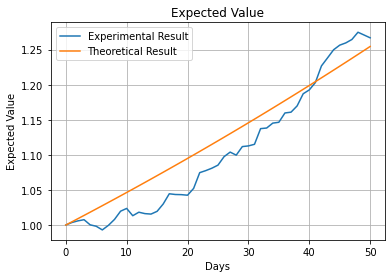

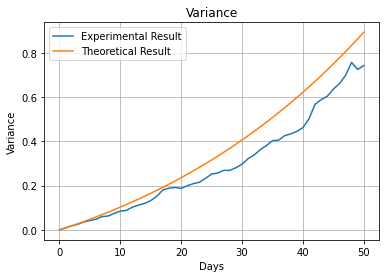

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = int(200)
day=int(51)
q=1
r=1.1

final_price = np.zeros((day,N))
var_p = np.zeros((day,N))
up_price = np.empty(day)
dn_price = np.empty(day)
fin_price = np.empty(day)

for i in range(N):
    stock = np.random.choice(['u','d'], day, p=[ 0.5 , 0.5 ])
    for j in range(day):        
        up_price[j] = np.count_nonzero(stock[0:j] == 'u') #Counting the times the value goes up
        dn_price[j] = np.count_nonzero(stock[0:j] == 'd') #Counting the times the value goes down
        fin_price[j] = up_price[j]-dn_price[j] #Counting overall price change
        final_price[j,i] = q*r**fin_price[j] #Final price calculation

EX_price = np.mean(final_price,axis=1)
for k in range(day):
    var_p[k,:]=(final_price[k,:]-EX_price[k])**2
variance=np.sum(var_p,axis=1)/ 200
#variance=np.mean(var_p,axis=1) this can also be used instead ofthe line above 

E_th=np.empty(51)
Var_th=np.empty(51)
for d in range(51):
    #Theoretical calculation of expected price
    E_th[d]=((r**2*0.5+1-0.5)/(r))**d 
    #Theoretical calculation of variance
    Var_th[d]=(((r**4)*0.5+1-0.5)/r**2)**d - (((r**2)*0.5+1-0.5)/r)**(2*d) 


day_num=np.arange(0, 51, 1)
fig1, ax1 = plt.subplots()
ax1.plot(day_num,EX_price)
ax1.plot(day_num,E_th)
ax1.set_title("Expected Value")
ax1.set_xlabel("Days")
ax1.set_ylabel("Expected Value")
ax1.legend(['Experimental Result', 'Theoretical Result'])
ax1.grid()

fig2, ax2 = plt.subplots()
ax2.plot(day_num,variance)
ax2.plot(day_num,Var_th)
ax2.set_title("Variance")
ax2.set_xlabel("Days")
ax2.set_ylabel("Variance")
ax2.legend(['Experimental Result', 'Theoretical Result'])
ax2.grid()


## Exercise  15

$$
X_i \sim Bern(\frac{n}{6})
$$

$$
\text{E}[X] = \frac{n}{6}
$$

$$
\text{Var}[X] = n  \frac{1}{6}  \frac{5}{6} = \frac{5n}{36}
$$

Markov:
$$
Pr[ X \geq \lambda ] \leq \frac{E[X]}{\lambda}.
$$

$$
\Pr[X\geq\frac{n}{4}] \leq \frac{\frac{n}{6}}{\frac{n}{4}} = \frac{2}{3}
$$

Chebyshev:
$$
Pr[ |X-\mathbb{E}(X)| \geq \lambda ] \leq \frac{ Var[X] }{\lambda^2}.
$$

$$
\Pr[X\geq\frac{n}{4}] = \Pr[X-\frac{n}{6} \geq \frac{n}{12}] \leq \Pr[|X-\frac{n}{6}| \geq \frac{n}{12}]
            \leq \frac{\frac{5n}{36}}{\frac{n^2}{12^2}} = \frac{20}{n}
$$


Chernoff: 
$$
\Pr[X\geq{a}] \leq \underset{t>0}{\text{minimize}}\frac{M_x (t)}{e^{ta}}
$$
$$
\frac{M_x (t)}{e^{ta}} = \frac{\prod_{i = 1}^{n} M_{x_i}(t)}{e^{ta}}
                     = (1+p(e^t +1))^n  e^{-ta} = g(t)
$$

$\frac{\partial g(t)}{\partial t}= n(1+p(e^t - 1))^{n-1} p e^t e^{-ta} + (1+p(e^t -1))^n a e^{-ta} $

$ = (1+p(e^t -1))^{n-1} e^{-ta} (np e^t -a(1+p(e^t -1))) $

Since t>0, the only term that can be equal to zero is: 

$ (np e^t -a(1+p(e^t -1))) = np e^t -a -ap e^t + ap = 0 $

$ e^t = \frac{a-ap}{np-ap} = \frac{a(1-p)}{p(n-a)} $

Taking the logarithm and setting these values $ a=\frac{n}{4}$ and $p=\frac{1}{6} $:

$ t = \ln(\frac{a(1-p)}{p(n-a)}) = \ln \frac{5}{3} $

$ \Pr[X \geq a] \leq (1+p(e^t -1))^n e^{-ta} = (1+\frac{1}{6}(\frac{5}{3} - 1))^n (\frac{3}{5})^{\frac{n}{4}} $
$ = (\frac{10}{9})^n (\frac{3}{5})^{\frac{n}{4}} = ((\frac{10}{9})(\frac{3}{5})^{\frac{1}{4}})^n \approx (0.978)^n $











[0.031 0.013 0.019 0.018 0.017 0.014 0.01  0.01  0.013 0.009 0.006 0.008
 0.016 0.009 0.012 0.008 0.017 0.014 0.008 0.011 0.019 0.01  0.012 0.016
 0.009 0.007 0.009 0.009 0.012 0.008 0.009 0.011 0.006 0.007 0.006 0.003
 0.013 0.003 0.008 0.01  0.007 0.004 0.004 0.008 0.001 0.005 0.01  0.
 0.007 0.    0.003]


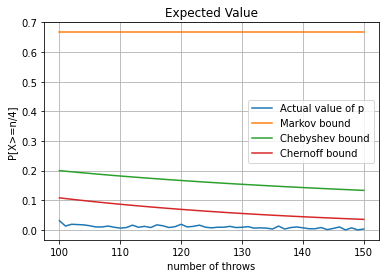

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

n_arr=np.linspace(100, 150, num=51)
n_arr = n_arr.astype(int)

num_t=int(51)
montecarlo=1000
p=np.empty(num_t)

for n in (n_arr):
    cnt=0
    dice=[]
    for i in range(montecarlo):
        a=np.random.randint(1, 7, size=n)
        s=sum(num == 6 for num in a)
        if s>=n/4:
            #counter for the number of senarios among 1000 experiments that 6 appears more than n/4
            cnt=cnt+1               
    p[n-n_arr[0]]=cnt/montecarlo
print(p)

#calculating different estimations of p (theoritical part)
p_m=2/3*np.ones(num_t)
p_chebyshev=np.empty(num_t)
p_chernoff=np.empty(num_t)
for n in (n_arr):
    p_chebyshev[n-n_arr[0]]=20/n
    p_chernoff[n-n_arr[0]]=(0.978)**n
    
throws=np.arange(100, 151, 1)
fig1, ax1 = plt.subplots()
ax1.plot(throws,p)
ax1.plot(throws,p_m)
ax1.plot(throws,p_chebyshev)
ax1.plot(throws,p_chernoff)

ax1.set_title("Expected Value")
ax1.set_xlabel("number of throws")
ax1.set_ylabel("P[X>=n/4]")
ax1.legend(['Actual value of p', 'Markov bound', 'Chebyshev bound','Chernoff bound'])
ax1.grid()           

Comparing the results, it can be seen that Chernoff bound is tighter than Markov bound and Chebyshev bound, therefore gives us better approximation for different values of n.